In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("../datasets/weight_height.csv", encoding="euc-kr", usecols=["학교명", "학년", "성별", "키", "몸무게"])
df

,학교명,학년,성별,키,몸무게
0,서울대도초등학교,1,남,125.8,27.3
1,서울대도초등학교,1,남,124.3,25.4
2,서울대도초등학교,1,남,119.2,23.5
3,서울대도초등학교,1,남,115.0,20.0
4,서울대도초등학교,1,남,120.0,33.5
...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4
9682,세종과학고등학교,3,남,174.1,88.8
9683,세종과학고등학교,3,남,169.5,63.2
9684,세종과학고등학교,3,여,159.2,52.9


In [3]:
# df["학교명"] -> 초등학교 = 0 / 중학교 = 6 / 고등학교 = 9 + df["학년"]
df["grade"] = df["학교명"].map(lambda x: 0 if x.endswith("초등학교")
                            else 6 if x.endswith("중학교")
                            else 9) + df["학년"]
df

,학교명,학년,성별,키,몸무게,grade
0,서울대도초등학교,1,남,125.8,27.3,1
1,서울대도초등학교,1,남,124.3,25.4,1
2,서울대도초등학교,1,남,119.2,23.5,1
3,서울대도초등학교,1,남,115.0,20.0,1
4,서울대도초등학교,1,남,120.0,33.5,1
...,...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4,12
9682,세종과학고등학교,3,남,174.1,88.8,12
9683,세종과학고등학교,3,남,169.5,63.2,12
9684,세종과학고등학교,3,여,159.2,52.9,12


In [4]:
df.drop(["학교명", "학년"], axis="columns", inplace=True)
df. columns =["gender", "height", "weight", "grade"]
df

,gender,height,weight,grade
0,남,125.8,27.3,1
1,남,124.3,25.4,1
2,남,119.2,23.5,1
3,남,115.0,20.0,1
4,남,120.0,33.5,1
...,...,...,...,...
9681,남,176.1,50.4,12
9682,남,174.1,88.8,12
9683,남,169.5,63.2,12
9684,여,159.2,52.9,12


In [5]:
# 남 : 0 / 여 : 1
df["gender"] = df["gender"].map(lambda x : 0 if x == "남" else 1)
df

,gender,height,weight,grade
0,0,125.8,27.3,1
1,0,124.3,25.4,1
2,0,119.2,23.5,1
3,0,115.0,20.0,1
4,0,120.0,33.5,1
...,...,...,...,...
9681,0,176.1,50.4,12
9682,0,174.1,88.8,12
9683,0,169.5,63.2,12
9684,1,159.2,52.9,12


In [6]:
# 데이터의 공백 또는 NoN 값을 확인
print(df.isna().sum())

gender    0
height    0
weight    4
grade     0
dtype: int64


In [7]:
# 9686개중 4개의 데이터 비정상임으로 인한 삭제 결정 및 결과 확인
df = df.dropna()
print(df.isna().sum())

gender    0
height    0
weight    0
grade     0
dtype: int64


In [8]:
# 몸무게와 키를 통해서 성별을 예측하고 싶다!! ml11 or ml12
# 1. 데이터셋 준비
x = df[["weight", "height"]]
y = df[["gender"]]

In [9]:
# 데이터 이상유무 재 확인
print(x.isna().sum())
print(x.isnull().sum())
print(x.shape, y.shape)


weight    0
height    0
dtype: int64
weight    0
height    0
dtype: int64
(9682, 2) (9682, 1)


In [50]:
# 2. 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [11]:
# 3. 모델 선택
model = LogisticRegression()

In [12]:
# 4. 모델 학습
model.fit(x_train, y_train)

c:\Users\Daniel\miniconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
# 5. 예측 및 평가
model.score(x_test, y_test)

0.5290877796901893

In [14]:
model.predict([[125.8, 27.3],[124.3, 25.4],[119.2, 23.5],[115.0, 20.0],[120.0, 33.5], [174.1, 88.8]])

c:\Users\Daniel\miniconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 0])

In [15]:
# 평가지표를 가져가다가 평가해 보세요! ml14 참고
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score

In [16]:
predict = model.predict(x_test)

In [17]:
cm = confusion_matrix(y_test, predict)
cm

array([[957, 553],
       [815, 580]])

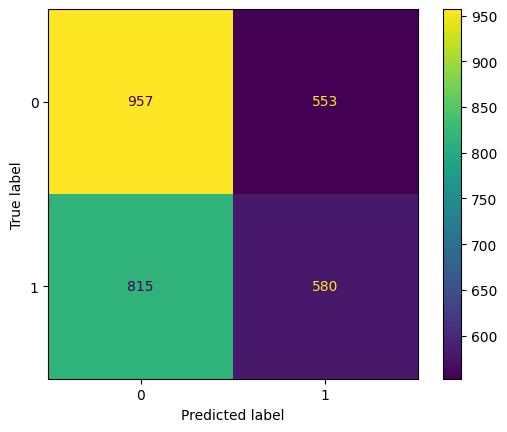

In [18]:
ConfusionMatrixDisplay(cm).plot()

In [19]:
cm.ravel()

array([957, 553, 815, 580])

In [20]:
# 남학생 기준 (남학생이 맞다 / 틀리다)
TP, FN, FP, TN = cm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)

In [21]:
print(precision_score(y_test, predict, average=None)[0])
print(f"남학생의 정밀도 :{precision}")

0.5400677200902935
남학생의 정밀도 :0.5400677200902935


In [22]:
print(recall_score(y_test, predict, average=None)[0])
print(f"남학생의 재현율 : {recall}")

0.633774834437086
남학생의 재현율 : 0.633774834437086


In [23]:
men_f1_score = 2 * ((precision * recall) / (precision + recall))

In [24]:
print(f1_score(y_test, predict, average=None)[0])
print(f"남학생의 F1-Score : {men_f1_score}")

0.583180987202925
남학생의 F1-Score : 0.583180987202925


In [25]:
# 여학생 기준 (1과 0이 뒤집혔으니까 거꾸로)
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)

In [26]:
print(precision_score(y_test, predict, average=None)[1])
print(f"여학생의 정밀도 :{precision}")

0.5119152691968226
여학생의 정밀도 :0.5119152691968226


In [27]:
print(recall_score(y_test, predict, average=None)[1])
print(f"여학생의 재현율 : {recall}")

0.4157706093189964
여학생의 재현율 : 0.4157706093189964


In [28]:
women_f1_score = 2 * ((precision * recall) / (precision + recall))

In [29]:
print(f1_score(y_test, predict, average=None)[1])
print(f"여학생의 F1-Score : {women_f1_score}")

0.4588607594936709
여학생의 F1-Score : 0.4588607594936709


In [30]:
# 전체 데이터 중 얼마나 정확하게 예측했는지 정확도를 확인 해본다.
accuracy = accuracy_score(y_test, predict)
print(f"score : {accuracy}")

score : 0.5290877796901893


In [31]:
# 위에서 알아본 각 항목을 데이터화 하여 확인해본다.
report = classification_report(y_test, predict, output_dict=True)
print(report)
df_report = pd.DataFrame(report)

{'0': {'precision': 0.5400677200902935, 'recall': 0.633774834437086, 'f1-score': 0.583180987202925, 'support': 1510.0}, '1': {'precision': 0.5119152691968226, 'recall': 0.4157706093189964, 'f1-score': 0.4588607594936709, 'support': 1395.0}, 'accuracy': 0.5290877796901893, 'macro avg': {'precision': 0.525991494643558, 'recall': 0.5247727218780412, 'f1-score': 0.5210208733482979, 'support': 2905.0}, 'weighted avg': {'precision': 0.5265487290416216, 'recall': 0.5290877796901893, 'f1-score': 0.5234816007470181, 'support': 2905.0}}


In [32]:
"""
if "gender" in df.columns:
    unique_labels = sorted(df["gender"].unique())  # [0, 1]
    label_map = {}  # ex) {'0': '남', '1': '여'}

    for lbl in unique_labels:
        label_map[str(lbl)] = df.loc[df["gender"] == lbl, "gender"].astype(str).unique()[0]

    # 숫자라면 사람이 읽을 수 있게 다시 한글로 변환 (선택사항)
    if set(unique_labels) == {0, 1}:
        label_map = {'0': '남학생', '1': '여학생'}

    # report DataFrame에 적용
    df_report.rename(columns=label_map, inplace=True)

print(df_report)
"""

'\nif "gender" in df.columns:\n    unique_labels = sorted(df["gender"].unique())  # [0, 1]\n    label_map = {}  # ex) {\'0\': \'남\', \'1\': \'여\'}\n\n    for lbl in unique_labels:\n        label_map[str(lbl)] = df.loc[df["gender"] == lbl, "gender"].astype(str).unique()[0]\n\n    # 숫자라면 사람이 읽을 수 있게 다시 한글로 변환 (선택사항)\n    if set(unique_labels) == {0, 1}:\n        label_map = {\'0\': \'남학생\', \'1\': \'여학생\'}\n\n    # report DataFrame에 적용\n    df_report.rename(columns=label_map, inplace=True)\n\nprint(df_report)\n'

In [33]:
df_report.rename(columns={"0": "남", "1": "여"}, inplace=True)
df_report

,남,여,accuracy,macro avg,weighted avg
precision,0.540068,0.511915,0.529088,0.525991,0.526549
recall,0.633775,0.415771,0.529088,0.524773,0.529088
f1-score,0.583181,0.458861,0.529088,0.521021,0.523482
support,1510.000000,1395.000000,0.529088,2905.000000,2905.000000


In [34]:
proba = model.predict_proba(x_test)
proba

array([[0.46933356, 0.53066644],
       [0.66698632, 0.33301368],
       [0.56519582, 0.43480418],
       ...,
       [0.46652726, 0.53347274],
       [0.57404822, 0.42595178],
       [0.61380844, 0.38619156]], shape=(2905, 2))

In [35]:
print(f"shape : {proba.shape}")
print(f"sum : {proba.sum(axis=1)}")

shape : (2905, 2)
sum : [1. 1. 1. ... 1. 1. 1.]


In [36]:
unique_classes = sorted(y_test["gender"].unique())
gender_name = lambda x: "Men" if x == 0 else "Women"

In [37]:
import matplotlib.pyplot as plt

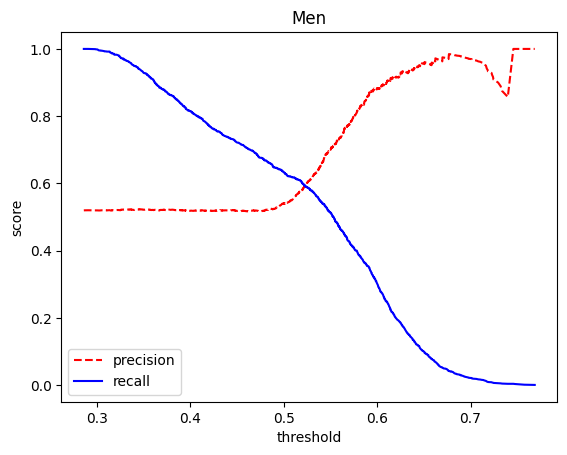

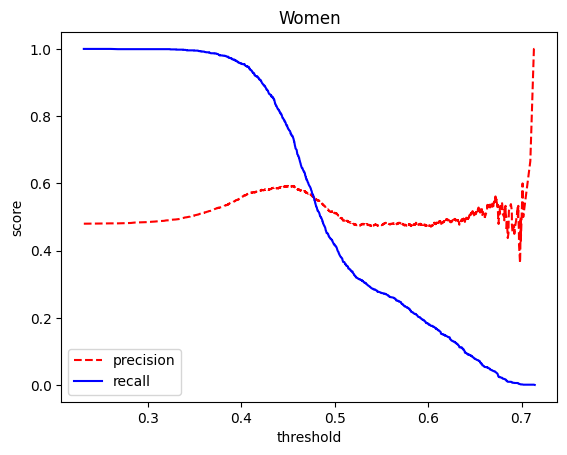

In [38]:
for i in unique_classes:
    precision, recall, thersholds = precision_recall_curve(y_test, proba[:, int(i)], pos_label=int(i))
    class_name = gender_name(i)

    plt.xlabel("threshold")
    plt.ylabel("score")
    plt.plot(thersholds, precision[: len(thersholds)], "red", linestyle="--", label="precision")
    plt.plot(thersholds, recall[: len(thersholds)], "blue", label ="recall")

    plt.legend()
    plt.title(class_name)
    plt.show()

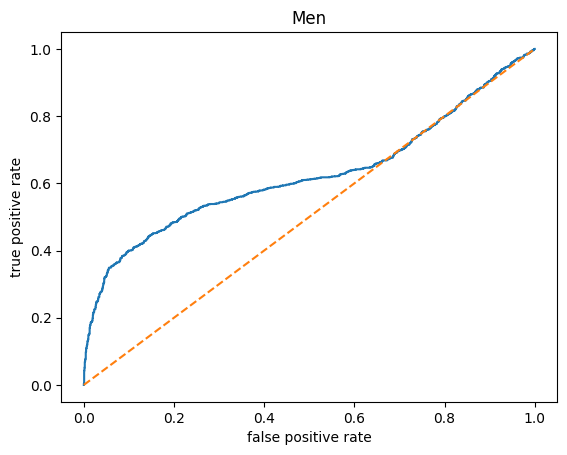

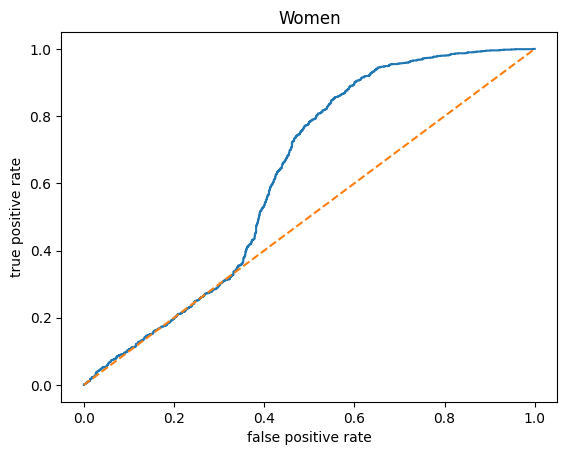

In [39]:
for i in unique_classes:
    fprs, tprs, thresholds = roc_curve(y_test, proba[:, int(i)], pos_label=int(i))
    class_name = gender_name(i)
    plt.plot(fprs, tprs)

    plt.plot([0, 1], [0, 1], "--")
    plt.title(class_name)

    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")

    plt.show()

In [55]:
# 이진 분류 이기 때문에 multi_class="ovo"를 사용하지 않는다.
roc_auc = roc_auc_score(y_test, proba[:, 1])
roc_auc

0.6247610909349854